In [3]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy

In [4]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

In [5]:
def read_single_window_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [6]:
def read_single_window_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

In [7]:
def read_single_window_offline_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200, k=1000):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQueryOfflineNew/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [8]:
def read_single_window_gt_offline_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200, k=1000):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQueryOffline/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

In [9]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

In [10]:
def get_avg_fsd(fsd_list):
    avg_fsd = {}
    
    all_keys = set().union(*[d.keys() for d in fsd_list])
    for key in all_keys:
        avg_fsd[key] = 0
        
    for fsd in fsd_list:
        for key, val in fsd.items():
            avg_fsd[key] += val
            
    avg_fsd = {key: int(val/len(fsd_list)) for key, val in avg_fsd.items()}
    sorted_fsd = dict(sorted(list(avg_fsd.items())))
    
    return sorted_fsd


In [18]:
def plot_mrd_in_single_dataset(datasets, k):
    # prepare testing avg fsd
    FSDs = {}
    for d in datasets:
        FSDs[d[:-9]] = read_single_window_offline_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
                                                    epochs=['10'], dataset=d, window_size=200, k=k)
    testing_avg_fsd = {}
    for name, fsd_list in FSDs.items():
        testing_avg_fsd[name] = []
        for i in range(10):
            testing_avg_fsd[name].append(get_avg_fsd(fsd_list[5*i:min(5+5*i, len(fsd_list))]))
        
    MRDs = []
    labels = list(FSDs.keys())
    indexs = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3']
    time_indexs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    
        
    for label in labels:
        MRDs = []
        for i, t_fsd1 in enumerate(testing_avg_fsd[label]):
            single_MRDs = []
            for j, t_fsd2 in enumerate(testing_avg_fsd[label]):
                # if i+1==j or i-1==j:
                #     single_MRDs.append(round(calculate_mrd(t_fsd1, t_fsd2), 2))
                # else:
                #     single_MRDs.append(0)
                
                single_MRDs.append(round(calculate_mrd(t_fsd1, t_fsd2), 2))
            MRDs.append(single_MRDs)
    
        # Plot heatmap
        plt.figure(figsize=(14, 14))
        plt.imshow(MRDs, cmap='Greens' , interpolation='nearest', vmax=1)

        # Add annotations for each cell
        for i in range(len(MRDs)):
            for j in range(len(MRDs[i])):
                plt.text(j, i, f'{MRDs[i][j]:.2f}', ha='center', va='center', color='black', fontsize=16)

        plt.xticks(np.arange(len(time_indexs)), time_indexs, rotation=0)
        plt.yticks(np.arange(len(time_indexs)), time_indexs, rotation=0)
        # plt.xticks(np.arange(len(profiler_fsd[label])), [i for i in range(1, len(profiler_fsd[label])+1)], rotation=0)
        # plt.yticks(np.arange(len(testing_fsd[label])), [i for i in range(1, len(testing_fsd[label])+1)], rotation=0)
        
        for i in range(0, 10):  # Loop through rows
            for j in range(0, 10):  # Loop through columns
                if i == j:
                    if i==0:
                        for z in range(2):
                            rect = plt.Rectangle((i-0.5+z,  j-0.5), 1, 1, linewidth=3, edgecolor='black', facecolor='none')
                            plt.gca().add_patch(rect)
                    elif i==9:
                        for z in range(2):
                            rect = plt.Rectangle((i-1.5+z,  j-0.5), 1, 1, linewidth=3, edgecolor='black', facecolor='none')
                            plt.gca().add_patch(rect)
                    else:
                        for z in range(3):
                            rect = plt.Rectangle((i-1.5+z,  j-0.5), 1, 1, linewidth=3, edgecolor='black', facecolor='none')
                            plt.gca().add_patch(rect)
        
        plt.xlabel('Profilers', fontsize=14)
        plt.ylabel('Testing', fontsize=14)
        if k == 0:
            plt.title(f'{label}\'s MRD of Adjacent Time (Sample All Flows)', fontsize=16)
        else:
            plt.title(f'{label}\'s MRD of Adjacent Time (Sample {k} Flows)', fontsize=16)
        plt.colorbar(shrink=0.8)  # Add colorbar
        # for i, label in enumerate(labels):
        #     plt.text(len(labels)+4, i, f'{indexs[i]} = {label}', ha='center', va='center', rotation=0)
        # plt.tight_layout()
        plt.show()   
        

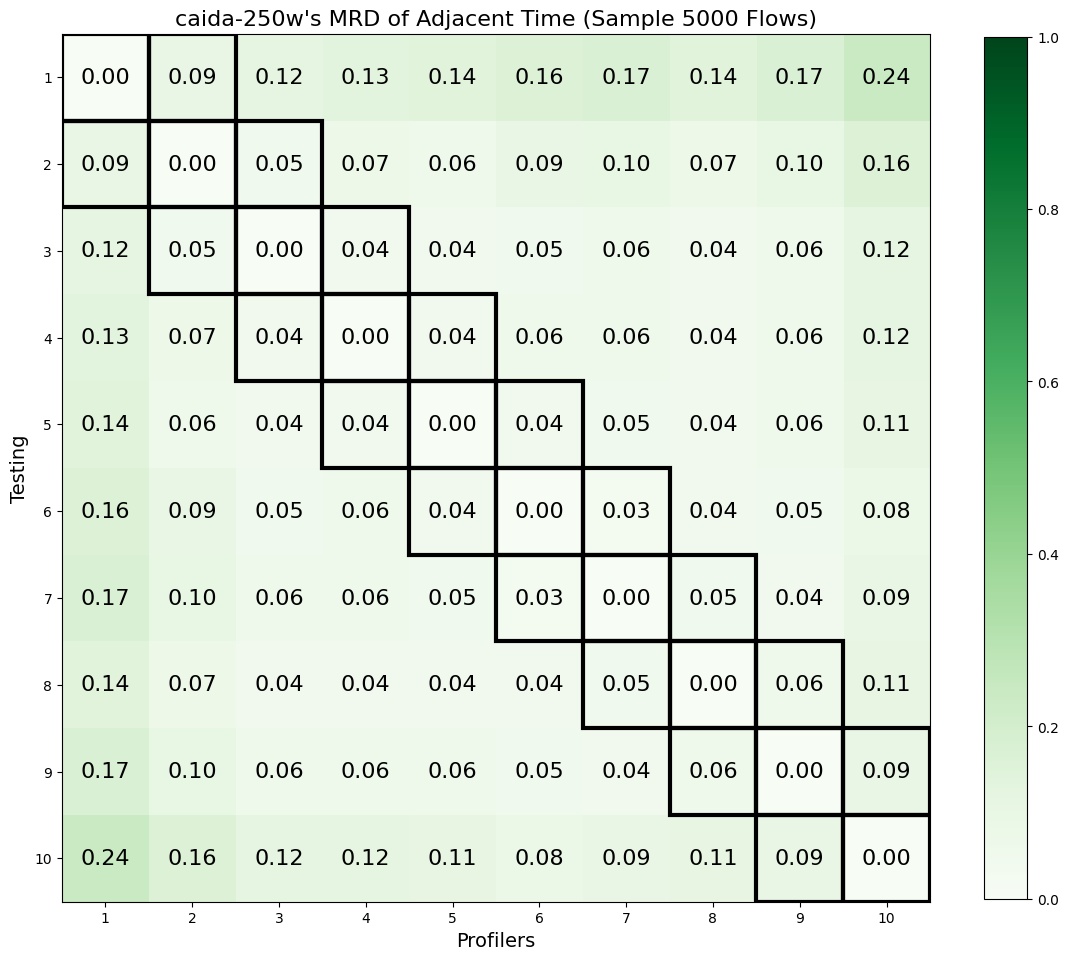

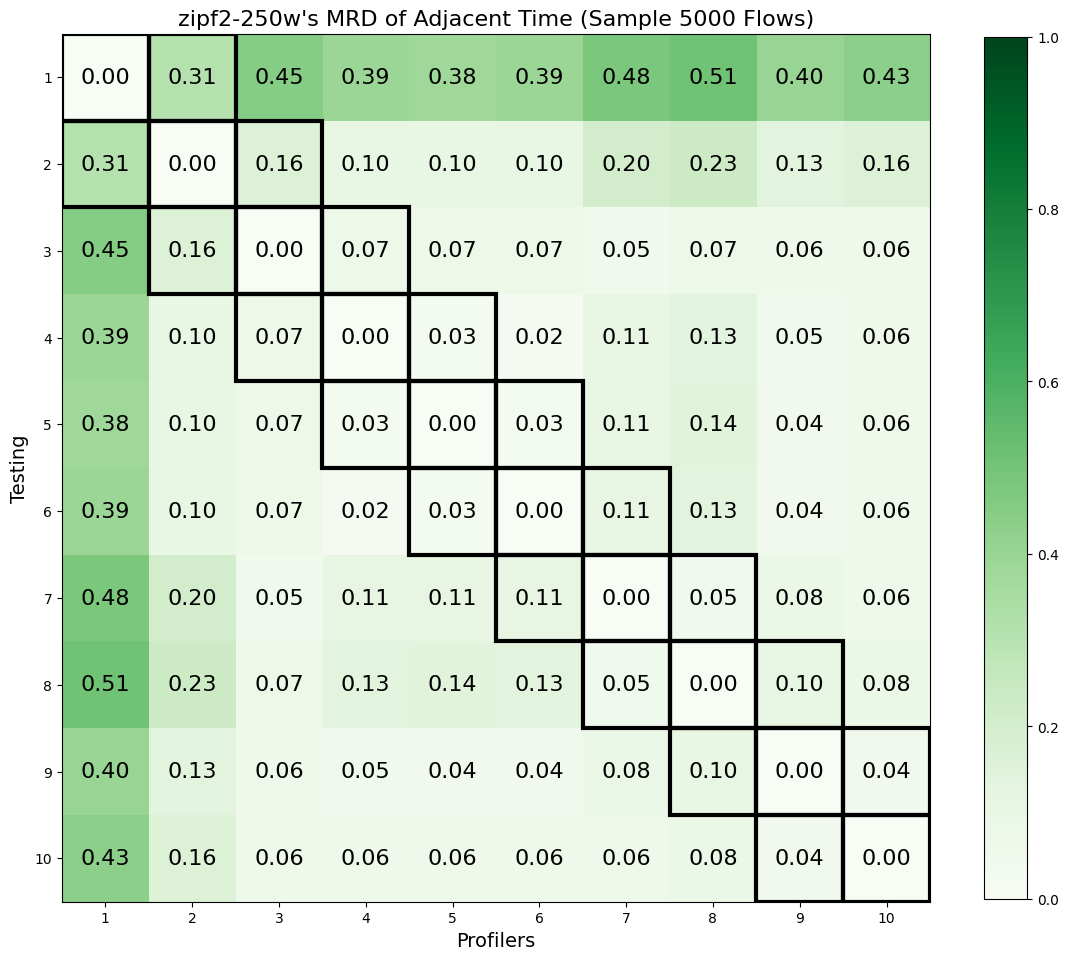

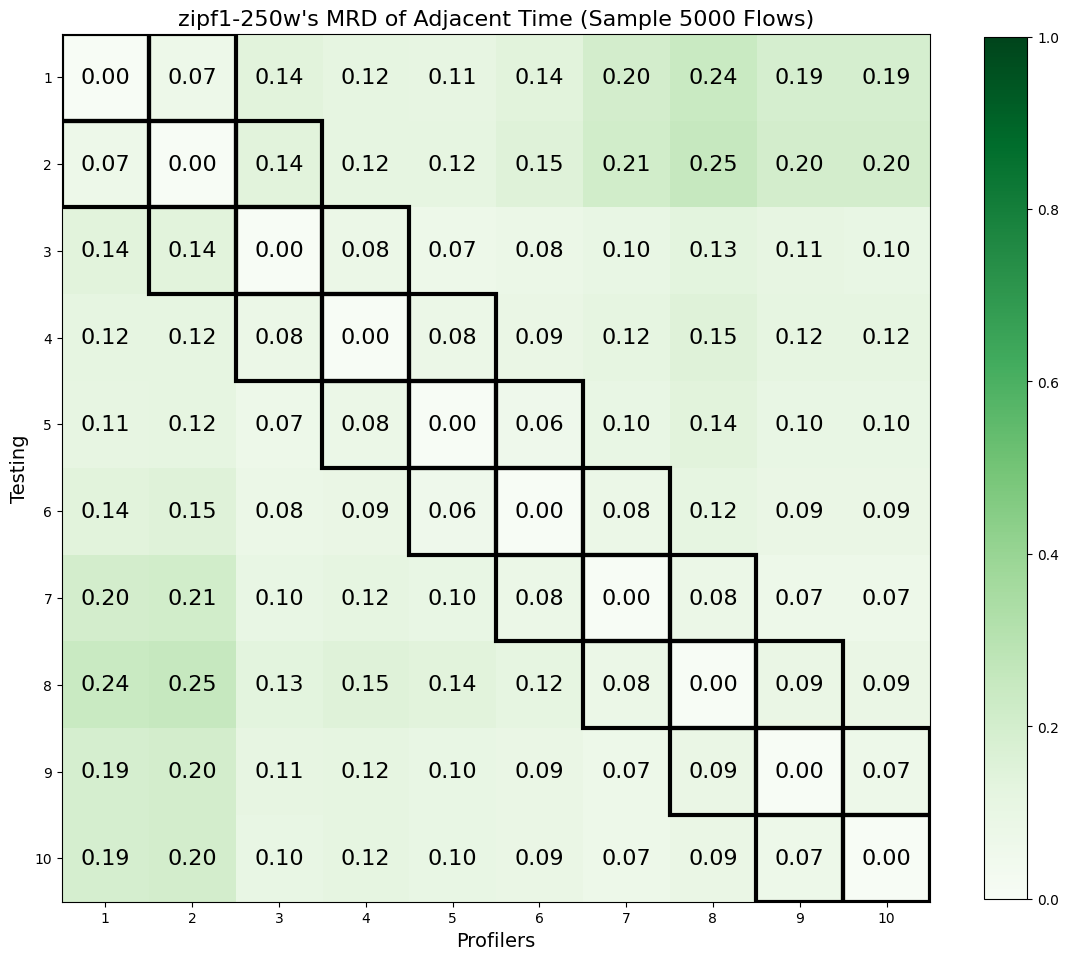

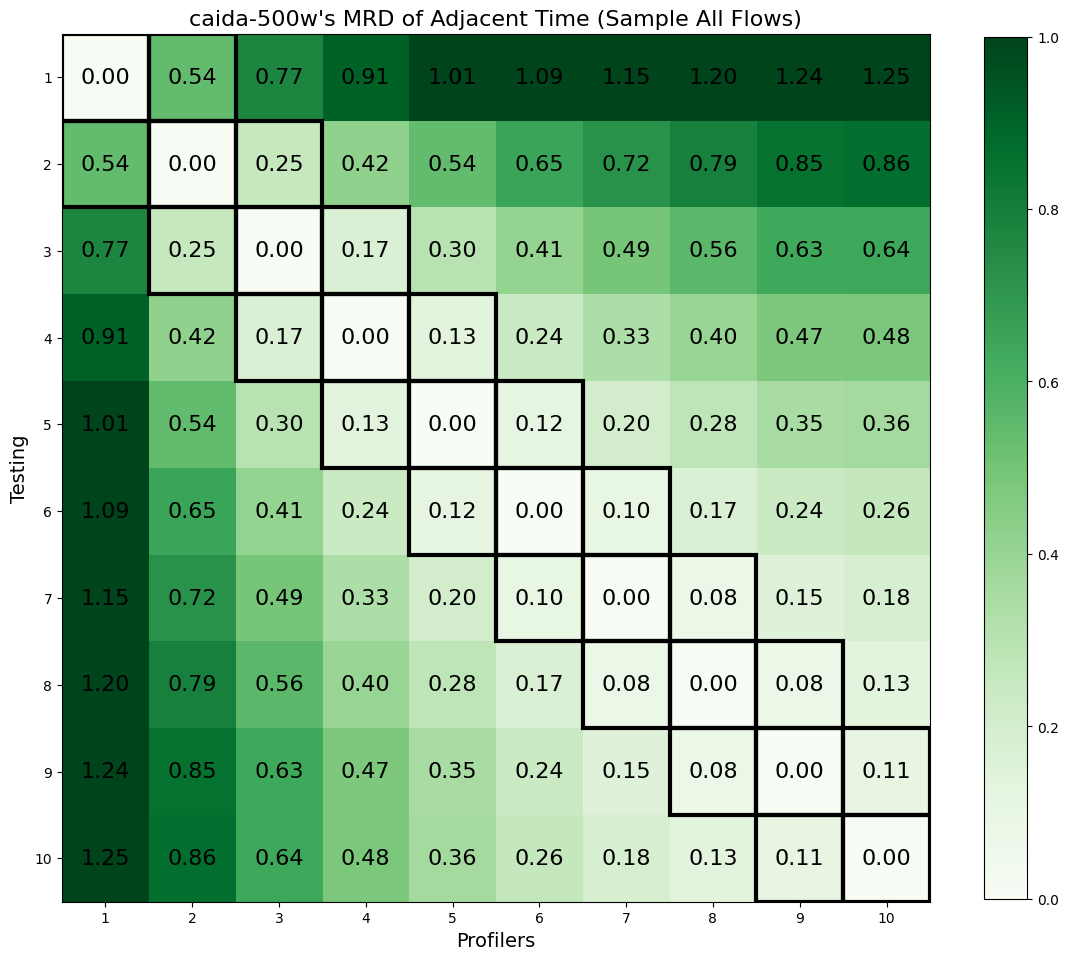

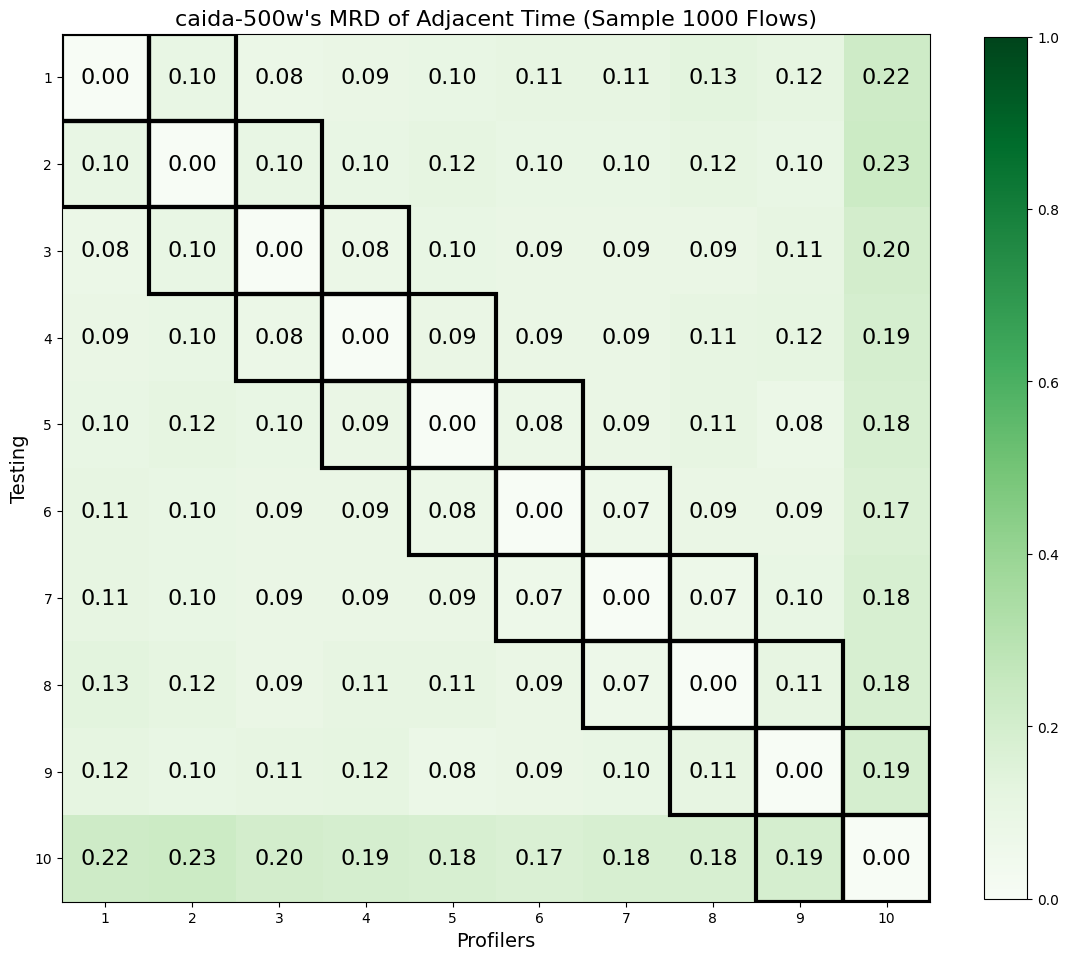

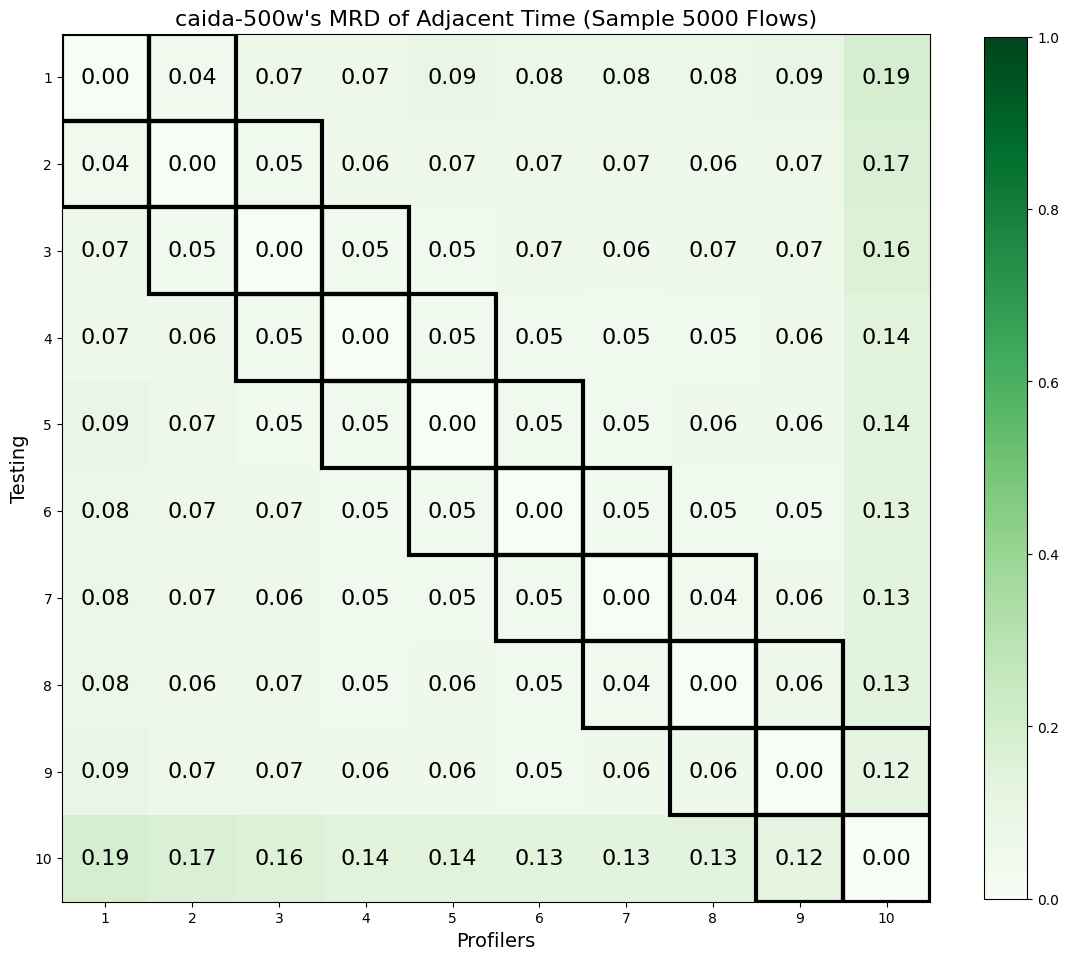

In [19]:
# plot_mrd_in_single_dataset(datasets=pcap_file[:10],k=0)
plot_mrd_in_single_dataset(datasets=[pcap_file[1], pcap_file[4], pcap_file[7]],k=5000)
plot_mrd_in_single_dataset(datasets=pcap_file[:1],k=0)
plot_mrd_in_single_dataset(datasets=pcap_file[:1],k=1000)
plot_mrd_in_single_dataset(datasets=pcap_file[:1],k=5000)

---

In [22]:
def normalize_fsd(fsd):
    fn = sum(list(fsd.values()))
    
    return {key: (val/fn) for key,val in fsd.items()}

In [23]:
def plot_single_mrd_variation(mrd_var, window_size=200):
    
    res = list(mrd_var.values())
    labels = list(mrd_var.keys())
    
    # res.append(mrd_var)
    
    # print(name)
    # print(mrd_var)

    plt.figure(figsize=(12, 4))
        
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('WMRD')
    plt.title('FSD Variation')
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

In [21]:
def plot_mrd_variation(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 100
    res_fsd = {}
    res_mrd = {}
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None, None] # 0, 1
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_single_window_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            
            for i in range(1, len(res_fsd[name])):
                # res_mrd[name].append(calculate_mrd(res_fsd[name][i-1], res_fsd[name][i]))
                res_mrd[name].append(calculate_mrd(normalize_fsd(res_fsd[name][i-1]), normalize_fsd(res_fsd[name][i])))
                
    plot_single_mrd_variation(res_mrd, window_size)

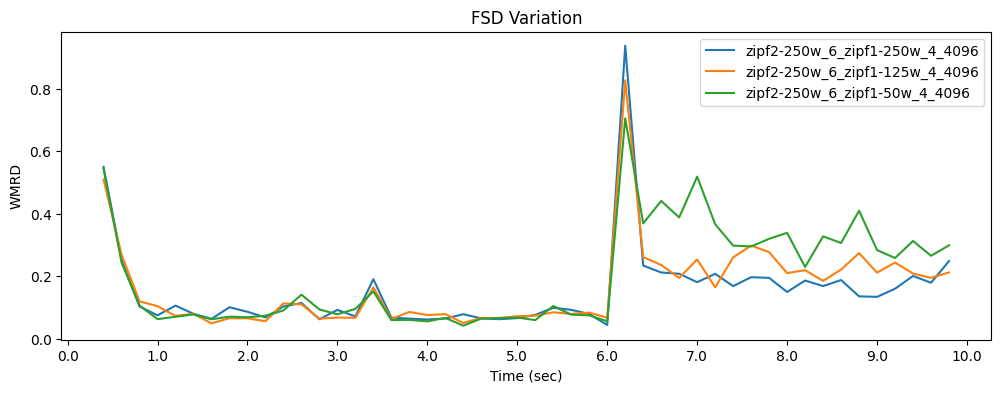

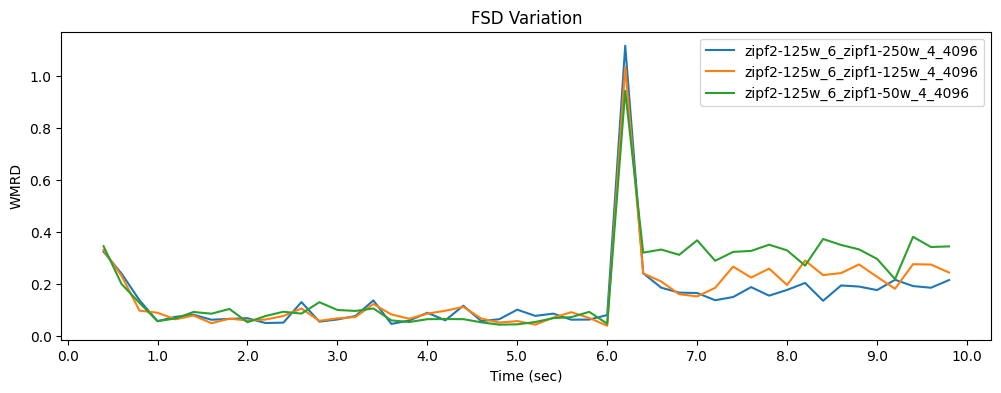

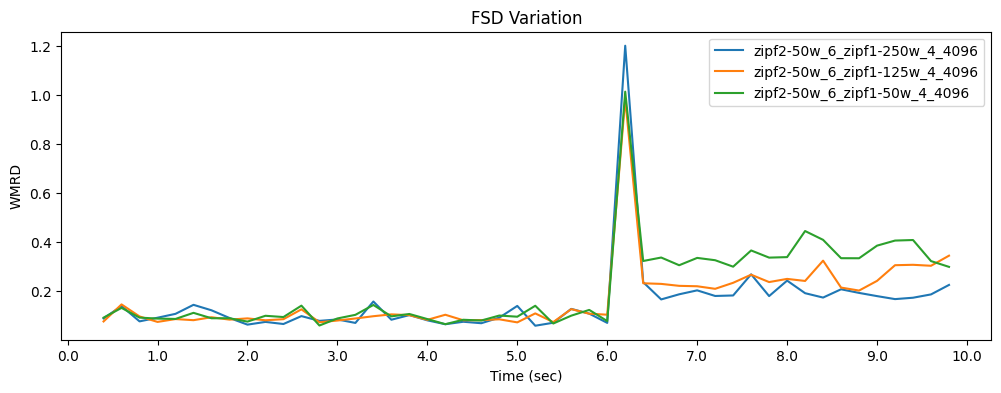

In [24]:
# plot_mrd_variation(datasets=pcap_file[0:4])
# plot_mrd_variation(datasets=pcap_file[4:7])
# plot_mrd_variation(datasets=pcap_file[7:10])


# for i in range(10, 22, 3):
#     plot_mrd_variation(datasets=pcap_file[i:i+3])
    
# for i in range(34, 46, 3):
#     plot_mrd_variation(datasets=pcap_file[i:i+3])

for i in range(58, 67, 3):
    plot_mrd_variation(datasets=pcap_file[i:i+3])
    
# for i in range(76, 88, 3):
#     plot_mrd_variation(datasets=pcap_file[i:i+3])
    
# for i in range(88, 94, 2):
#     plot_mrd_variation(datasets=pcap_file[i:i+2])

# for i in range(94, 100, 2):
#     plot_mrd_variation(datasets=pcap_file[i:i+2])

---

In [32]:
def get_fsd_dict(dataset):
    fsd = {}
    with open(dataset, "r") as file:
        for line in file:
            items = line.strip().split(" ")
            fsd[int(items[0])] = int(items[1])
    
    sorted_fsd = dict(sorted(list(fsd.items())))
    
    return sorted_fsd

/tmp/ipykernel_18183/4237828544.py:65: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


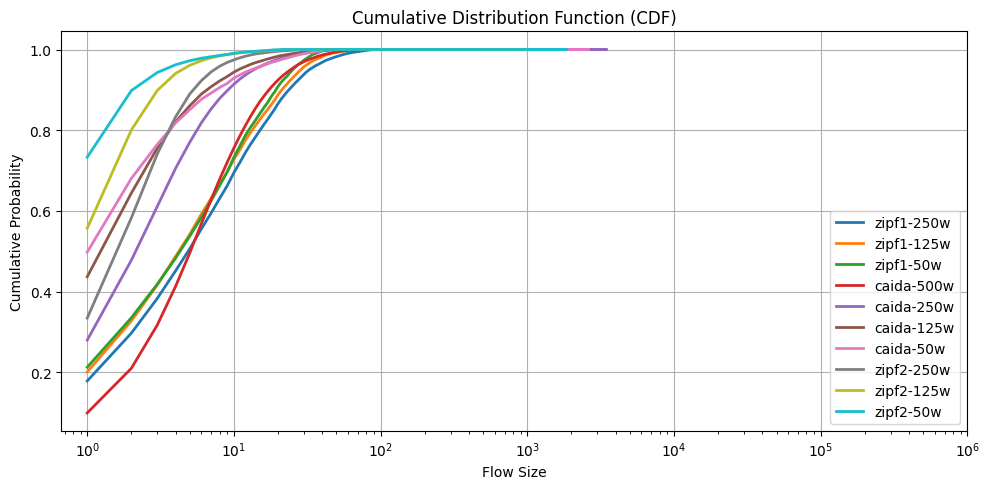

In [34]:
def plot_sampled_fsd():
    # Prepare origin fsd
    pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
    pcap_names = ["zipf1-250w.txt", "caida-250w.txt", "zipf2-250w.txt"]
    origin_fsd = {}
    for file_name in pcap_names:
        file_path = pcap_folder + file_name
        origin_fsd[file_name[:-4]] = get_fsd_dict(file_path)
        
        
    # Get Testing avg fsd
    test_datasets = zipf1 + caida + zipf2
    testing_fsd = {}
    for d in test_datasets:
        testing_fsd[d] = read_single_window_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
                                                    epochs=['10'], dataset=f'{d}_10_.pcap', window_size=200)
    testing_avg_fsd = {}
    for name, fsd_list in testing_fsd.items():
        testing_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    ## Cal origin CDF
    fs = []
    prob = []
    cdfs = []
    labels = []
    # for name, fsd in origin_fsd.items(): 
    #     print(name)
    #     flow_size = list(fsd.keys())
    #     frequency = list(fsd.values()) 

    #     total_flows = sum(frequency)
    #     probabilities = [freq / total_flows for freq in frequency]
        
    #     cdf = np.cumsum(probabilities)
        
    #     fs.append(flow_size)
    #     prob.append(probabilities)
    #     cdfs.append(cdf)
    #     labels.append(f'{name}-ORIGIN')
        
    for name, fsd in testing_avg_fsd.items(): 
        flow_size = list(fsd.keys())
        frequency = list(fsd.values()) 

        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(f'{name}')
    
    plt.figure(figsize=(10, 5))
    # Plot CDF
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], linestyle='-', label = labels[i], linewidth=(3 if len(labels[i].split("-")) > 2 else 2))
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
        
plot_sampled_fsd()